# Number 1

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
import os

In [10]:
os.getcwd()

'C:\\Users\\hplap'

In [11]:
os.chdir("C:\\Users\\hplap\\Downloads")

In [12]:
data = pd.read_csv("house_prices.csv")

In [13]:
data

,SqFt,Bedrooms,Bathrooms,Neighborhood,Price
0,1790,2,2,East,114300
1,2030,4,2,East,114200
2,1740,3,2,East,114800
3,1980,3,2,East,94700
4,2130,3,3,East,119800
...,...,...,...,...,...
123,1900,3,3,East,119700
124,2160,4,3,East,147900
125,2070,2,2,North,113500
126,2020,3,3,West,149900


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SqFt          128 non-null    int64 
 1   Bedrooms      128 non-null    int64 
 2   Bathrooms     128 non-null    int64 
 3   Neighborhood  128 non-null    object
 4   Price         128 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 5.1+ KB


In [15]:
data['Neighborhood'] = data['Neighborhood'].astype('category')

In [16]:
data.dropna(inplace=True)
data.nunique()

SqFt             61
Bedrooms          4
Bathrooms         3
Neighborhood      3
Price           123
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SqFt          128 non-null    int64   
 1   Bedrooms      128 non-null    int64   
 2   Bathrooms     128 non-null    int64   
 3   Neighborhood  128 non-null    category
 4   Price         128 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 4.4 KB


In [18]:
data.describe()

,SqFt,Bedrooms,Bathrooms,Price
count,128.000000,128.000000,128.000000,128.000000
mean,2000.937500,3.023438,2.445312,130427.343750
std,211.572431,0.725951,0.514492,26868.770371
min,1450.000000,2.000000,2.000000,69100.000000
25%,1880.000000,3.000000,2.000000,111325.000000
50%,2000.000000,3.000000,2.000000,125950.000000
75%,2140.000000,3.000000,3.000000,148250.000000
max,2590.000000,5.000000,4.000000,211200.000000


C:\Users\hplap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


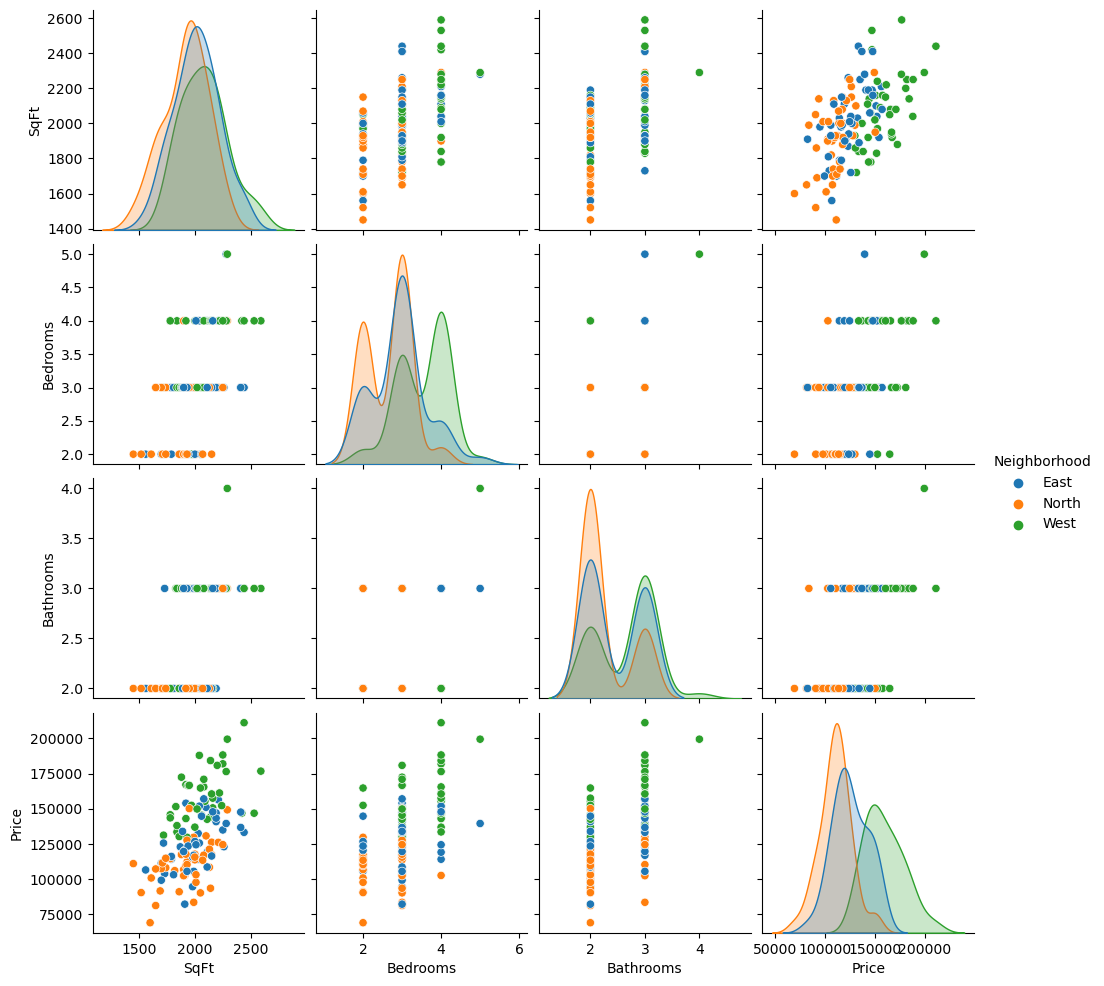

In [19]:
sns.pairplot(data, hue = 'Neighborhood')

In [20]:
data_dummy = pd.get_dummies(data)
data_dummy.head()

,SqFt,Bedrooms,Bathrooms,Price,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1790,2,2,114300,True,False,False
1,2030,4,2,114200,True,False,False
2,1740,3,2,114800,True,False,False
3,1980,3,2,94700,True,False,False
4,2130,3,3,119800,True,False,False


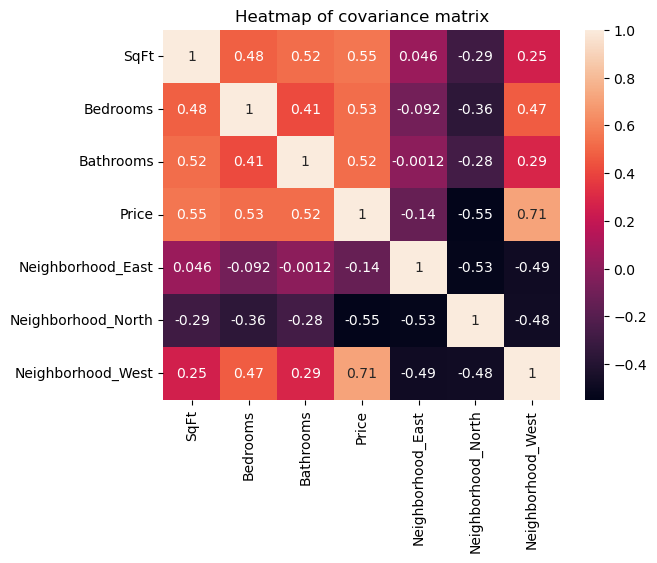

In [23]:
sns.heatmap(data_dummy.corr(), annot = True, yticklabels = True)
plt.title("Heatmap of covariance matrix")
plt.show()

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
transformer = ColumnTransformer(transformers=[('location', OneHotEncoder(sparse_output=False), ["Neighborhood"])], remainder='passthrough')

In [23]:
transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('location', OneHotEncoder(sparse_output=False),
                                 ['Neighborhood'])])

In [24]:
df = transformer.fit_transform(data)

In [28]:
df

,location__Neighborhood_East,location__Neighborhood_North,location__Neighborhood_West,remainder__SqFt,remainder__Bedrooms,remainder__Bathrooms,remainder__Price
0,1.0,0.0,0.0,1790,2,2,114300
1,1.0,0.0,0.0,2030,4,2,114200
2,1.0,0.0,0.0,1740,3,2,114800
3,1.0,0.0,0.0,1980,3,2,94700
4,1.0,0.0,0.0,2130,3,3,119800
...,...,...,...,...,...,...,...
123,1.0,0.0,0.0,1900,3,3,119700
124,1.0,0.0,0.0,2160,4,3,147900
125,0.0,1.0,0.0,2070,2,2,113500
126,0.0,0.0,1.0,2020,3,3,149900


In [25]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,location__Neighborhood_East,location__Neighborhood_North,location__Neighborhood_West,remainder__SqFt,remainder__Bedrooms,remainder__Bathrooms,remainder__Price
0,1.0,0.0,0.0,1790,2,2,114300
1,1.0,0.0,0.0,2030,4,2,114200
2,1.0,0.0,0.0,1740,3,2,114800
3,1.0,0.0,0.0,1980,3,2,94700
4,1.0,0.0,0.0,2130,3,3,119800


In [26]:
P = df.to_numpy()

In [27]:
X = df_dummy.drop(columns=['remainder__Price']) # Features
y = df_dummy['remainder__Price'] # Target variable

In [32]:
X

,location__Neighborhood_East,location__Neighborhood_North,location__Neighborhood_West,remainder__SqFt,remainder__Bedrooms,remainder__Bathrooms
0,1.0,0.0,0.0,1790,2,2
1,1.0,0.0,0.0,2030,4,2
2,1.0,0.0,0.0,1740,3,2
3,1.0,0.0,0.0,1980,3,2
4,1.0,0.0,0.0,2130,3,3
...,...,...,...,...,...,...
123,1.0,0.0,0.0,1900,3,3
124,1.0,0.0,0.0,2160,4,3
125,0.0,1.0,0.0,2070,2,2
126,0.0,0.0,1.0,2020,3,3


In [28]:
X_encode = P[:, 0:6]
X_encode

array([[1.00e+00, 0.00e+00, 0.00e+00, 1.79e+03, 2.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.03e+03, 4.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.74e+03, 3.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.98e+03, 3.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.13e+03, 3.00e+00, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.78e+03, 3.00e+00, 2.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 1.83e+03, 3.00e+00, 3.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 2.16e+03, 4.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.11e+03, 4.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.73e+03, 3.00e+00, 3.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.03e+03, 3.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.87e+03, 2.00e+00, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.91e+03, 3.00e+00, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.15e+03, 3.00e+00, 3.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+

In [29]:
train_X, test_X, train_y, test_y = train_test_split(X_encode, y, test_size=0.2, random_state=42)
print("train size: ", train_X.shape[0])
print("test size: ", test_X.shape[0])

train size:  102
test size:  26


In [30]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(train_X, train_y)

LinearRegression()

In [31]:
# Make predictions given the fitted model:
train_pred_y = linear_reg.predict(train_X)

In [32]:
test_pred_y = linear_reg.predict(test_X)

In [33]:
from sklearn.metrics import mean_squared_error as mse

In [34]:
rmse_train = np.sqrt(mse(train_y, train_pred_y))

In [35]:
rmse_train

14067.463277743977

In [36]:
rmse_test = np.sqrt(mse(test_y, test_pred_y))

In [37]:
rmse_test

16099.659294811521

# Number 2

In [1]:
from sklearn import datasets, linear_model, metrics

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\hplap'

In [6]:
os.chdir("C:\\Users\\hplap\\Downloads")

In [7]:
data2 = pd.read_csv("diabetes.csv")

In [8]:
data2.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [9]:
diabetes = datasets.load_diabetes()
xencode = diabetes.data

In [10]:
xencode

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [11]:
Y = diabetes.target

In [12]:
x_train, x_test, Y_train, Y_test = train_test_split(xencode, Y, test_size=0.2, random_state=42)


In [13]:
# Initialize weights
w =  np.random.uniform(low=-0.1, high=0.1, size=xencode.shape[1])
b = 0.0

In [14]:
learning_rate = 0.05
iter = 100000
rmse_train_list = []

In [15]:
for i in range(iter):
    Y_pred_train = x_train.dot(w) + b
    error = Y_train - Y_pred_train
    
    mean_squared_error_train = np.mean(np.power(error, 2))
    
    w_gradient_train = -(2.0/len(x_train)) * error.dot(x_train)
    b_gradient_train = -(2.0/len(x_train)) * np.sum(error)
    
    w = w - (learning_rate * w_gradient_train)
    b = b - (learning_rate * b_gradient_train)
    
    root_mse_train = np.sqrt(np.mean(np.power(Y_train - x_train.dot(w) - b, 2)))
    rmse_train_list.append(root_mse_train)
    
    if i % 5000 == 0: 
       print("Epoch %d: %f" % (i, root_mse_train))
 

Epoch 0: 158.797897
Epoch 5000: 54.980427
Epoch 10000: 53.988021
Epoch 15000: 53.859765
Epoch 20000: 53.833280
Epoch 25000: 53.823230
Epoch 30000: 53.816667
Epoch 35000: 53.811032
Epoch 40000: 53.805721
Epoch 45000: 53.800579
Epoch 50000: 53.795561
Epoch 55000: 53.790655
Epoch 60000: 53.785853
Epoch 65000: 53.781152
Epoch 70000: 53.776550
Epoch 75000: 53.772045
Epoch 80000: 53.767634
Epoch 85000: 53.763314
Epoch 90000: 53.759085
Epoch 95000: 53.754944


In [16]:
# testing
Y_pred = x_test.dot(w) + b 
error_test = Y_test - Y_pred 
mean_squared_error_test = np.mean(np.power(error_test, 2)) 
root_mse_test = np.sqrt(mean_squared_error_test)

In [17]:
root_mse_test

53.72013399961999

In [18]:
root_mse_train

53.750889098110086

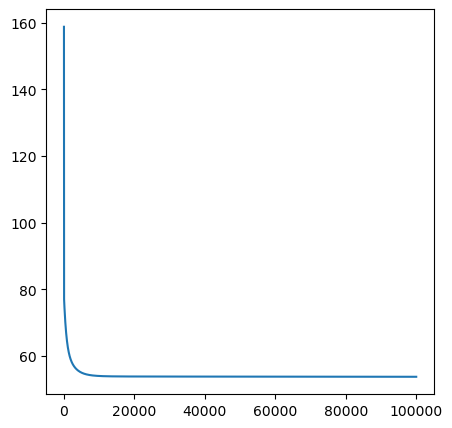

In [19]:
plt.figure(figsize=(5,5))
plt.plot(range(len(rmse_train_list)), rmse_train_list)
plt.show()

In [20]:
hyperparameter_combinations = [ (0.05, 20000), 
                               (0.05, 1000), 
                               (0.0001, 10000), 
                               (0.0001, 20000), 
                               (0.0001, 1000), 
                               (0.000001, 10000), 
                               (0.000001, 20000), 
                               (0.000001, 1000), 
                               (0.5, 50000), 
                               (0.5, 1000) ] 
# Lists to store RMSE values for each trial 
rmse_train_list = [] 
rmse_test_list = [] 
# Loop over hyperparameter combinations 
for trial, (learning_rate, iterations) in enumerate(hyperparameter_combinations, 1): 
    print(f"\nTrial: {trial}, Learning Rate: {learning_rate}, Iterations: {iterations}") 
    
    # Split the data into training and testing sets 
    x_train, x_test, Y_train, Y_test = train_test_split(xencode, Y, test_size=0.2, random_state=42) 
    # Initialize weights 
    w = np.random.uniform(low=-0.1, high=0.1, size=xencode.shape[1]) 
    b = 0.0 
    
    # Training loop 
    for epoch in range(iterations): 
        Y_pred_train = x_train.dot(w) + b 
        error = Y_train - Y_pred_train 
        
        w_gradient_train = -(2.0/len(x_train)) * error.dot(x_train) 
        b_gradient_train = -(2.0/len(x_train)) * np.sum(error) 
        
        w = w - (learning_rate * w_gradient_train) 
        b = b - (learning_rate * b_gradient_train) 
    
    # Calculate RMSE on training set 
    rmse_train = np.sqrt(np.mean(np.power(Y_train - x_train.dot(w) - b, 2))) 
    rmse_train_list.append(rmse_train) 
    print(f"RMSE Train: {rmse_train}") 
    
    # Calculate RMSE on testing set 
    Y_pred_test = x_test.dot(w) + b 
    rmse_test = np.sqrt(np.mean(np.power(Y_test - Y_pred_test, 2))) 
    rmse_test_list.append(rmse_test) 
    print(f"RMSE Test: {rmse_test}")


Trial: 1, Learning Rate: 0.05, Iterations: 20000
RMSE Train: 53.83329139723261
RMSE Test: 53.66755620149614

Trial: 2, Learning Rate: 0.05, Iterations: 1000
RMSE Train: 63.31242155982301
RMSE Test: 59.194811217175825

Trial: 3, Learning Rate: 0.0001, Iterations: 10000
RMSE Train: 80.16077819264989
RMSE Test: 73.42127124356294

Trial: 4, Learning Rate: 0.0001, Iterations: 20000
RMSE Train: 76.97172874005221
RMSE Test: 71.94488431645017

Trial: 5, Learning Rate: 0.0001, Iterations: 1000
RMSE Train: 148.01971542832746
RMSE Test: 138.5458051787916

Trial: 6, Learning Rate: 1e-06, Iterations: 10000
RMSE Train: 169.65595523145714
RMSE Test: 160.21799908959775

Trial: 7, Learning Rate: 1e-06, Iterations: 20000
RMSE Train: 167.01135208049402
RMSE Test: 157.56473432840252

Trial: 8, Learning Rate: 1e-06, Iterations: 1000
RMSE Train: 172.09338463358046
RMSE Test: 162.66090667655982

Trial: 9, Learning Rate: 0.5, Iterations: 50000
RMSE Train: 53.594912112261774
RMSE Test: 53.765916863237784

Tri